In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('teams.csv')

In [4]:
df.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [6]:
df.isna().any()

team             False
country          False
year             False
events           False
athletes         False
age              False
height           False
weight           False
medals           False
prev_medals       True
prev_3_medals     True
dtype: bool

In [7]:
df['prev_medals'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2139    False
2140    False
2141    False
2142    False
2143    False
Name: prev_medals, Length: 2144, dtype: bool

In [8]:
df[df['prev_medals'].isna() == True]

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
19,ALB,Albania,1992,8,9,25.3,163.0,75.2,0,NaN,NaN
26,ALG,Algeria,1964,7,7,26.0,175.0,65.0,0,NaN,NaN
39,AND,Andorra,1976,2,3,28.3,174.7,78.0,0,NaN,NaN
50,ANG,Angola,1980,14,17,17.4,171.7,62.5,0,NaN,NaN
59,ANT,Antigua and Barbuda,1976,11,17,23.2,178.6,71.6,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,6,20.5,157.0,57.0,0,NaN,NaN
2103,YAR,North Yemen,1984,3,3,27.7,163.3,57.7,0,NaN,NaN
2105,YEM,Yemen,1992,8,8,19.6,169.0,60.0,0,NaN,NaN
2112,YMD,South Yemen,1988,5,5,23.6,175.0,63.3,0,NaN,NaN


In [9]:
teams = df[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [10]:
teams.corr(numeric_only=True)["medals"].drop("medals")

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
Name: medals, dtype: float64

In [11]:
import seaborn as sns

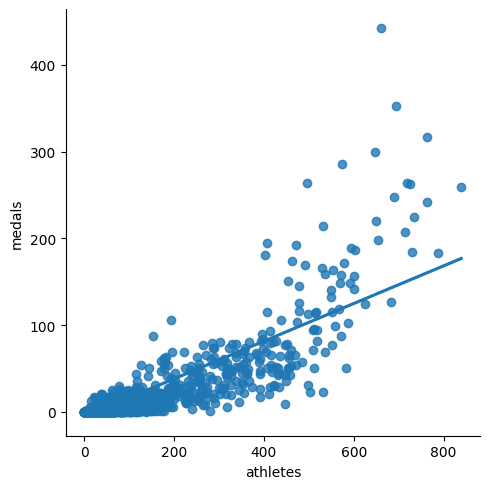

In [12]:
sns.lmplot(x="athletes", y="medals", data=teams, fit_reg=True, ci=False)

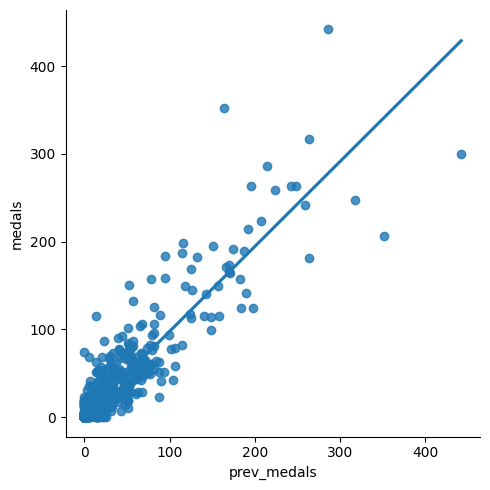

In [13]:
sns.lmplot(x="prev_medals", y="medals", data=teams, fit_reg=True, ci=False)

<Axes: ylabel='Frequency'>

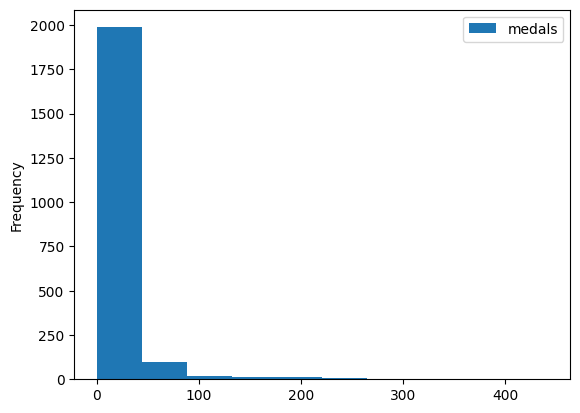

In [14]:
teams.plot.hist(y="medals")

In [15]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [16]:
teams = teams.dropna()

In [17]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals


In [18]:
train = teams[teams['year'] < 2012].copy()
test = teams[teams['year'] >= 2012].copy()

In [19]:
train.shape

(1609, 7)

In [20]:
test.shape

(405, 7)

In [21]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [22]:
predictors = ['athletes', 'prev_medals']
target = "medals"

In [23]:
reg.fit(train[predictors], train[target])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
predictions = reg.predict(test[predictors])

In [25]:
test['predictions'] = predictions

In [26]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [27]:
test.loc[test['predictions'] < 0, 'predictions'] = 0

In [28]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [29]:
test['predictions'] = test['predictions'].round()

In [30]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [31]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['medals'], test['predictions'])

In [32]:
error

3.2987654320987656

In [56]:
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [52]:
test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [53]:
test[test['team'] == 'IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [54]:
errors = (test['medals'] - test['predictions']).abs()

In [55]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [38]:
errors_by_team = errors.groupby(test['team']).mean()

In [41]:
errors_by_team['USA']

np.float64(32.5)

In [42]:
medals_by_team = test['medals'].groupby(test['team']).mean()

In [43]:
error_ratio = errors_by_team/ medals_by_team

In [57]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

In [58]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

In [48]:
import numpy as np

In [49]:
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [59]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

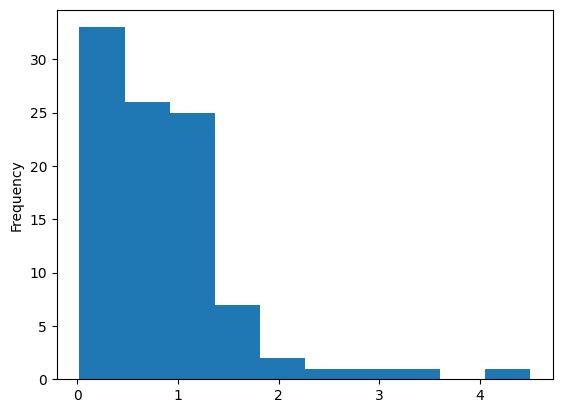

In [51]:
error_ratio.plot.hist()